In [7]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#1. Three Layers CovNets

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def plt_dynamic(x, vy, ty, colors=['b']):
    plt.plot(x, vy, color = 'b', label='Validation Loss')
    plt.plot(x, ty, color = 'r', label='Train Loss')
    plt.xlabel('epoch')
    plt.ylabel('Categorical Crossentropy Loss')
    plt.legend()
    plt.grid()
    plt.show();

In [4]:
model = Sequential()
# Block 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.2998 - acc: 0.9050 - val_loss: 0.0487 - val_acc: 0.9841
Epoch 2/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0971 - acc: 0.9714 - val_loss: 0.0310 - val_acc: 0.9902
Epoch 3/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0720 - acc: 0.9786 - val_loss: 0.0292 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0594 - acc: 0.9827 - val_loss: 0.0253 - val_acc: 0.9908
Epoch 5/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0528 - acc: 0.9842 - val_loss: 0.0251 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0458 - acc: 0.9860 - val_loss: 0.0230 - val_acc: 0.9928
Epoch 7/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0449 - acc: 0.9868 - val_loss: 0.0218 - 

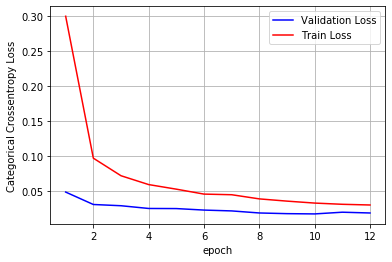

In [5]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)

In [8]:
model = Sequential()
# Block 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.2264 - acc: 0.9291 - val_loss: 0.0412 - val_acc: 0.9866
Epoch 2/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0802 - acc: 0.9764 - val_loss: 0.0367 - val_acc: 0.9882
Epoch 3/12
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0627 - acc: 0.9811 - val_loss: 0.0273 - val_acc: 0.9914
Epoch 4/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.0377 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0480 - acc: 0.9855 - val_loss: 0.0298 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0417 - acc: 0.9872 - val_loss: 0.0223 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0411 - acc: 0.9874 - val_loss: 0.0256 - 

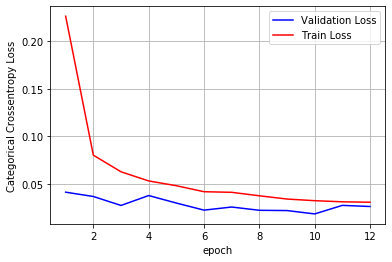

In [9]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)

In [10]:
model = Sequential()
# Block 1
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

# Block 2
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 246s 4ms/step - loss: 0.2451 - acc: 0.9220 - val_loss: 0.0489 - val_acc: 0.9847
Epoch 2/12
60000/60000 [==============================] - 245s 4ms/step - loss: 0.0923 - acc: 0.9723 - val_loss: 0.0326 - val_acc: 0.9891
Epoch 3/12
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0705 - acc: 0.9787 - val_loss: 0.0355 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0606 - acc: 0.9819 - val_loss: 0.0289 - val_acc: 0.9911
Epoch 5/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0579 - acc: 0.9827 - val_loss: 0.0421 - val_acc: 0.9863
Epoch 6/12
60000/60000 [==============================] - 241s 4ms/step - loss: 0.0505 - acc: 0.9842 - val_loss: 0.0267 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0488 - acc: 0.9852 - val_loss: 0.0319 - 

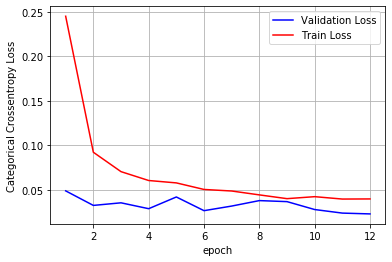

In [11]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)

#2. 5 Layers

In [14]:
model = Sequential()
# Block 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 4
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 5
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 5, 5, 64)         

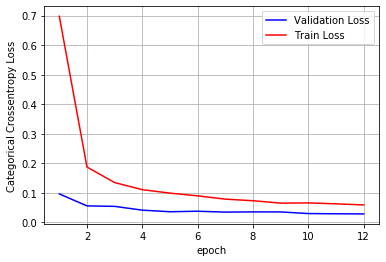

In [15]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)

In [16]:
model = Sequential()
# Block 1
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Block 4
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 5
model.add(Conv2D(64, (1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 4, 4, 64)        

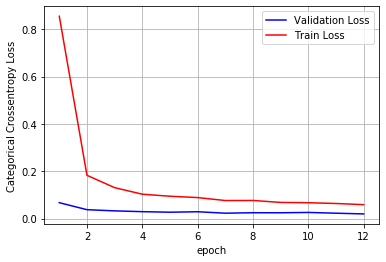

In [20]:
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)

In [0]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["#layers", "Train Loss/Acc","Test Loss/Acc"]

x.add_row(['3 layers (Conv2D: 32 3x3+[Conv2D: 64 3x3+MaxPooling+Dropout(25%)]x2+Dense(128)+Dropout(50%)+Output)','3% / 99.1%','1.88% / 99.35%'])
x.add_row(['3 layers (Conv2D: 32 3x3+[Conv2D: 64 3x3+MaxPooling+Dropout(25%)]x2+Dense(128)+BN+Dropout(50%)+Output)','3.1% / 99.02%','2.64% / 99.27%'])
x.add_row(['3 layers (Conv2D: 32 5x5+Conv2D: 64 5x5+MaxPooling+Dropout(25%)+Conv2D: 64 1x1+MaxPooling+Dropout(25%)+Dense(128)+BN+Dropout(50%)+Output)','4% / 98.78%','2.3% / 99.26%'])
x.add_row(['5 layers (Conv2D: 32 3x3+[Conv2D: 64 3x3+MaxPooling+Dropout(25%)]x4+Dense(128)+Dropout(50%)+Output)','6% / 98.51%','2.88% / 99.27%'])
x.add_row(['5 layers (Conv2D: 32 3x3+Conv2D: 64 3x3+MaxPooling+Dropout(25%)+Conv2D: 64 5x5+MaxPooling+Dropout(50%)+\
Conv2D: 64 3x3+MaxPooling+Dropout(25%)+Conv2D: 64 1x1+MaxPooling+Dropout(25%)+Dense(128)+Dropout(50%)+Output)','5.91% / 98.51%','1.99% / 99.48%'])

In [19]:
print(x)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+----------------+
|                                                                                                       #layers                                                                                                        | Train Loss/Acc | Test Loss/Acc  |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------+----------------+
|                                                         3 layers (Conv2D: 32 3x3+[Conv2D: 64 3x3+MaxPooling+Dropout(25%)]x2+Dense(128)+Dropout(50%)+Output)                                                          |   3% / 99.1%   | 1.88% / 99.35